## 查看Pipeline支持的任务类型

In [1]:
from transformers.pipelines import SUPPORTED_TASKS

In [3]:
# 一共支持以下这么多个items()
for k, v in SUPPORTED_TASKS.items():
    print(k, v)

audio-classification {'impl': <class 'transformers.pipelines.audio_classification.AudioClassificationPipeline'>, 'tf': (), 'pt': (<class 'transformers.models.auto.modeling_auto.AutoModelForAudioClassification'>,), 'default': {'model': {'pt': ('superb/wav2vec2-base-superb-ks', '372e048')}}, 'type': 'audio'}
automatic-speech-recognition {'impl': <class 'transformers.pipelines.automatic_speech_recognition.AutomaticSpeechRecognitionPipeline'>, 'tf': (), 'pt': (<class 'transformers.models.auto.modeling_auto.AutoModelForCTC'>, <class 'transformers.models.auto.modeling_auto.AutoModelForSpeechSeq2Seq'>), 'default': {'model': {'pt': ('facebook/wav2vec2-base-960h', '55bb623')}}, 'type': 'multimodal'}
text-to-audio {'impl': <class 'transformers.pipelines.text_to_audio.TextToAudioPipeline'>, 'tf': (), 'pt': (<class 'transformers.models.auto.modeling_auto.AutoModelForTextToWaveform'>, <class 'transformers.models.auto.modeling_auto.AutoModelForTextToSpectrogram'>), 'default': {'model': {'pt': ('suno

## pipeline的创建和使用方式

In [4]:
from transformers import *  # 一般不推荐这样子使用，需要哪一个类就导入哪一个类

C:\Users\yj.wang\AppData\Roaming\Python\Python310\site-packages\transformers\deepspeed.py:23: FutureWarning: transformers.deepspeed module is deprecated and will be removed in a future version. Please import deepspeed modules directly from transformers.integrations
  warnings.warn(
C:\Users\yj.wang\AppData\Roaming\Python\Python310\site-packages\transformers\generation_utils.py:24: FutureWarning: Importing `GenerationMixin` from `src/transformers/generation_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import GenerationMixin` instead.
  warnings.warn(


### 根据任务类型直接创建Pipeline，默认都是英文的模型

In [6]:
pipe = pipeline("text-classification")  # 通过pipeline直接传入任务类型来创建，记得打开VPN，默认是英文的模型

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
config.json: 100%|██████████| 629/629 [00:00<00:00, 637kB/s]
C:\Users\yj.wang\AppData\Roaming\Python\Python310\site-packages\huggingface_hub\file_download.py:147: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\yj.wang\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to

In [7]:
pipe("very good")  # 调用pipeline直接传入文本，得到输出的结果

[{'label': 'POSITIVE', 'score': 0.9998520612716675}]

### 还可以指定任务类型，在指定模型，创建基于指定模型的pipeline

In [8]:
# https://huggingface.co  模型可以在该网站上查询，并且下载
pipe = pipeline("text-classification", model="uer/roberta-base-finetuned-dianping-chinese")  # 指定下载中文的模型

loading configuration file config.json from cache at C:\Users\yj.wang/.cache\huggingface\hub\models--uer--roberta-base-finetuned-dianping-chinese\snapshots\25faf1874b21e76db31ea9c396ccf2a0322e0071\config.json
Model config BertConfig {
  "_name_or_path": "uer/roberta-base-finetuned-dianping-chinese",
  "architectures": [
    "BertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "negative (stars 1, 2 and 3)",
    "1": "positive (stars 4 and 5)"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "negative (stars 1, 2 and 3)": 0,
    "positive (stars 4 and 5)": 1
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.35.2",
  "ty

In [9]:
# 该任务是文本分类的任务
pipe("我觉得不太行！")

[{'label': 'negative (stars 1, 2 and 3)', 'score': 0.9735506772994995}]

In [15]:
pipe("我觉得行")  # 这个预测错了

[{'label': 'negative (stars 1, 2 and 3)', 'score': 0.6892685890197754}]

### 也可以预先加载模型，再创建pipeline

In [16]:
# 这种方式，必须同时指定model和tokenizer(分词器)
model = AutoModelForSequenceClassification.from_pretrained("uer/roberta-base-finetuned-dianping-chinese")  # 加载模型 
tokenizer = AutoTokenizer.from_pretrained("uer/roberta-base-finetuned-dianping-chinese")  # 加载分词器
pipe = pipeline("text-classification", model=model, tokenizer=tokenizer)  # 创建pipeline

loading configuration file config.json from cache at C:\Users\yj.wang/.cache\huggingface\hub\models--uer--roberta-base-finetuned-dianping-chinese\snapshots\25faf1874b21e76db31ea9c396ccf2a0322e0071\config.json
Model config BertConfig {
  "_name_or_path": "uer/roberta-base-finetuned-dianping-chinese",
  "architectures": [
    "BertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "negative (stars 1, 2 and 3)",
    "1": "positive (stars 4 and 5)"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "negative (stars 1, 2 and 3)": 0,
    "positive (stars 4 and 5)": 1
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.35.2",
  "ty

In [18]:
pipe("我觉得不太行")

[{'label': 'negative (stars 1, 2 and 3)', 'score': 0.9743660688400269}]

再此之前我们的模型全部都是在cpu上进行推理运算的，我们并没有吧它放到显卡上面去运行

In [19]:
# 查看模型运行在什么设备上
pipe.model.device

device(type='cpu')

In [21]:
import torch
import time
times = []
for i in range(100):
    # torch.cuda.synchronize()
    start = time.time()
    pipe("我觉得不太行！")
    # torch.cuda.synchronize()
    end = time.time()
    times.append(end - start)
print(sum(times) / 100)

0.11570310831069947


### 确定pipeline的参数（怎么用）
1. 官方文档里面查找<br/>
2. 直接查看源代码


In [22]:
qa_pipe = pipeline("question-answering", model="uer/roberta-base-chinese-extractive-qa")

loading configuration file config.json from cache at C:\Users\yj.wang/.cache\huggingface\hub\models--uer--roberta-base-chinese-extractive-qa\snapshots\9b02143727b9c4655d18b43a69fc39d5eb3ddd53\config.json
Model config BertConfig {
  "_name_or_path": "uer/roberta-base-chinese-extractive-qa",
  "architectures": [
    "BertForQuestionAnswering"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.35.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 21128
}

loading configuration file config.json from cache at C:\Users\yj.wang/.cache\huggingface\hub\models--uer-

In [23]:
qa_pipe  # 打印实例就可以找到对应的最后一层的源代码

In [ ]:
QuestionAnsweringPipeline   # 然后ctrl 点击查看源代码，example会给一个使用的示例，看到__call__()方法里面的参数就是所有可以使用的参数

In [25]:
qa_pipe(question="中国的首都是哪里？",context="中国的首都是北京", max_answer_len=1)  # max_answer_len最大的输出值

{'score': 0.0022874046117067337, 'start': 6, 'end': 7, 'answer': '北'}

### 其他pipeline示例
0样本目标检测

In [26]:
checkpoint = "google/owlvit-base-patch32"
detector = pipeline(model=checkpoint, task="zero-shot-object-detection")

config.json: 100%|██████████| 4.42k/4.42k [00:00<00:00, 2.04MB/s]
loading configuration file config.json from cache at C:\Users\yj.wang/.cache\huggingface\hub\models--google--owlvit-base-patch32\snapshots\cbc355fb364588351c5d51c7f74465e8e7ec6f72\config.json
text_config is None. Initializing the OwlViTTextConfig with default values.
vision_config is None. initializing the OwlViTVisionConfig with default values.
Model config OwlViTConfig {
  "_name_or_path": "google/owlvit-base-patch32",
  "architectures": [
    "OwlViTForObjectDetection"
  ],
  "initializer_factor": 1.0,
  "logit_scale_init_value": 2.6592,
  "model_type": "owlvit",
  "projection_dim": 512,
  "text_config": {
    "bos_token_id": 0,
    "dropout": 0.0,
    "eos_token_id": 2,
    "max_length": 16,
    "model_type": "owlvit_text_model",
    "pad_token_id": 1
  },
  "text_config_dict": null,
  "torch_dtype": "float32",
  "transformers_version": "4.35.2",
  "vision_config": {
    "dropout": 0.0,
    "model_type": "owlvit_visi

In [28]:
detector

In [ ]:
ZeroShotObjectDetectionPipeline 

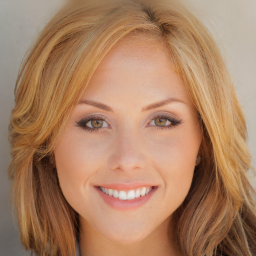

In [34]:
from PIL import Image
im = Image.open("./images/face.png")
im

In [35]:
prediction = detector(
    im,
    candidate_labels=["face", "eyes", 'teeth'],
)
prediction

[]

[]